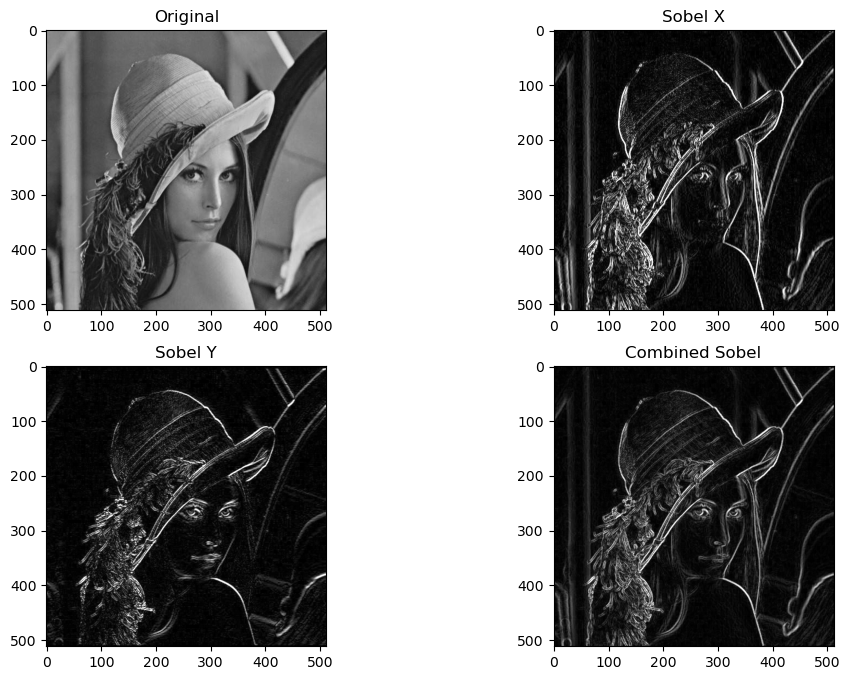

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'lena.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    # Apply Sobel operator
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Edge Detection on the Y axis

    # Convert to absolute values
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)

    # Combine the two images
    combined_sobel = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)

    # Display the images
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
    plt.subplot(2, 2, 2), plt.imshow(abs_sobelx, cmap='gray'), plt.title('Sobel X')
    plt.subplot(2, 2, 3), plt.imshow(abs_sobely, cmap='gray'), plt.title('Sobel Y')
    plt.subplot(2, 2, 4), plt.imshow(combined_sobel, cmap='gray'), plt.title('Combined Sobel')
    plt.show()


(<AxesSubplot: title={'center': 'Original'}>,
 Text(0.5, 1.0, 'Original'))

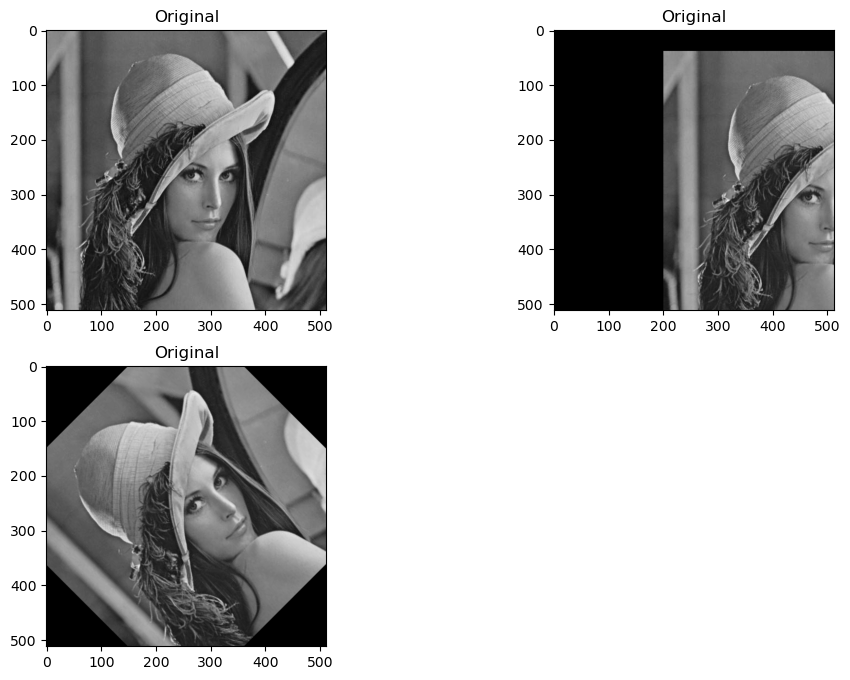

In [3]:
# 对图像进行变换
import numpy as np

rows, cols = image.shape
width, height = rows, cols

# 定义变换矩阵,x轴平移50个像素,y轴移动40个像素，这个和图形学的变换一样的
displacement_matrix = np.float32([
    [1, 0, 200],[0, 1, 40]
])
# 第三个参数是输出图像的尺寸(宽，高)。
after_dis = cv2.warpAffine(image, displacement_matrix, (width, height))

# 旋转矩阵（旋转出格了咋处理，就不要了）1.旋转中心，2.旋转角度(逆时针)，3.缩放比例
rotate_matrix = cv2.getRotationMatrix2D((width * 0.5, height * 0.5), 45, 1.0)
after_rotate = cv2.warpAffine(image, rotate_matrix, (width, height))

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(2, 2, 2), plt.imshow(after_dis, cmap='gray'), plt.title('Original')
plt.subplot(2, 2, 3), plt.imshow(after_rotate, cmap='gray'), plt.title('Original')


In [4]:
# 直方图匹配算法：
def hist_matching(ori_img, ref_img):
    # 计算直方图
    hist_original = cv2.calcHist([ori_img], [0], None, [256], [0, 256]).ravel()
    hist_reference = cv2.calcHist([ref_img], [0], None, [256], [0, 256]).ravel()

    # 计算CDF
    cdf_original = hist_original.cumsum()
    cdf_reference = hist_reference.cumsum()

    # 归一化CDF
    cdf_original = (cdf_original / cdf_original[-1]).astype(np.float32)
    cdf_reference = (cdf_reference / cdf_reference[-1]).astype(np.float32)

    # 计算映射表
    M = np.zeros(256)
    for i in range(256):
        idx = np.abs(cdf_reference - cdf_original[i]).argmin()
        M[i] = idx

    # 应用映射
    matched_image = M[ref_img.flatten()].reshape(ref_img.shape).astype(np.uint8)
    return matched_image

In [5]:
# 计算直方图
# Load the image
bse_path = 'bse.bmp'  # Replace with your image path
bse = cv2.imread(bse_path, cv2.IMREAD_GRAYSCALE)

ct_path = 'ct.bmp'  # Replace with your image path
ct = cv2.imread(ct_path, cv2.IMREAD_GRAYSCALE)

bse_hist = cv2.calcHist([bse], [0], None, [256], [0, 256])
ct_hist = cv2.calcHist([ct], [0], None, [256], [0, 256])

base_equalize = cv2.equalizeHist(bse)
ct_equalize = cv2.equalizeHist(ct)

# 将bse图像朝着ct图像进行匹配
matched_bse_img = hist_matching(ct, bse)
matched_bse_hist = cv2.calcHist([matched_bse_img], [0], None, [256], [0, 256])

# 对bse图像进行直方图均衡化，调高对比度
matched_base_equalize = cv2.equalizeHist(matched_bse_img)

# correlation = cv2.compareHist(bse_hist, ct_hist, cv2.HISTCMP_CORREL)
# print("Correlation:", correlation)



(<AxesSubplot: title={'center': 'matched_base_equalize'}>,
 Text(0.5, 1.0, 'matched_base_equalize'))

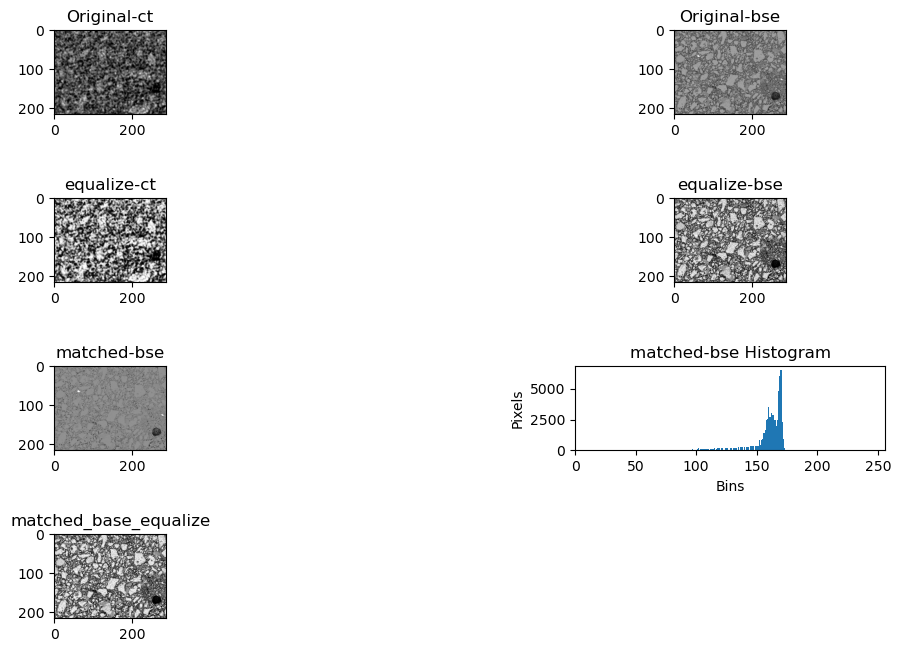

In [6]:
rows = 6
cols = 2
plt.figure(figsize=(12, 12))
# 调整子图间距
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
# plt.subplot(rows, cols, 1), plt.title("bse Histogram"), plt.xlabel("Bins") ,plt.ylabel("Pixels"), plt.bar(range(256), bse_hist.ravel(), width=1), plt.xlim([0, 256])
# plt.subplot(rows, cols, 2), plt.title("ct bar"), plt.xlabel("Bins") ,plt.ylabel("Pixels"), plt.bar(range(256), ct_hist.ravel(), width=1), plt.xlim([0, 256])
# plt.subplot(rows, cols, 3), plt.title("bse equalize"), plt.xlabel("Bins") ,plt.ylabel("Pixels"), plt.hist(base_equalize.ravel(), bins=256, range=[0, 256])
# plt.subplot(rows, cols, 4), plt.title("ct equalize"), plt.xlabel("Bins") ,plt.ylabel("Pixels"), plt.hist(ct_equalize.ravel(), bins=256, range=[0, 256])

plt.subplot(rows, cols, 5), plt.imshow(ct, cmap='gray'), plt.title('Original-ct')
plt.subplot(rows, cols, 6), plt.imshow(bse, cmap='gray'), plt.title('Original-bse')
plt.subplot(rows, cols, 7), plt.imshow(ct_equalize, cmap='gray'), plt.title('equalize-ct')
plt.subplot(rows, cols, 8), plt.imshow(base_equalize, cmap='gray'), plt.title('equalize-bse')

plt.subplot(rows, cols, 9), plt.imshow(matched_bse_img, cmap='gray'), plt.title('matched-bse')
plt.subplot(rows, cols, 10), plt.title("matched-bse Histogram"), plt.xlabel("Bins") ,plt.ylabel("Pixels"), plt.bar(range(256), matched_bse_hist.ravel(), width=1), plt.xlim([0, 256])
plt.subplot(rows, cols, 11), plt.imshow(matched_base_equalize, cmap='gray'), plt.title('matched_base_equalize')
